# La clase `relacion`

Para utilizar la clase, primero importamos el fichero que la contiene

In [1]:
from relaciones import *

Para definir una relación, podemos o bien dar un conjunto de parejas, o bien un conjunto de parejas y el universo donde están los elementos de los pares. En caso de no proporcionar el universo, se tomará como universo el conjunto de todos los valores que aparecen en las parejas.

Por ejemplo, definamos en el conjunto $\{0,1,\ldots,11\}$ la relación de ser congruentes módulo 5

In [2]:
u =set(range(12))
rl = set((a,b) for a in u for b in u if (a-b)%5 ==0)

In [3]:
r =relacion(rl,u)

Sabemos que esta relación es de equivalencia

In [4]:
r.es_equivalencia()

True

Y podemos calcular sus clases de equivalencia (hemos congelado las clases para poder crear un conjunto de conjuntos)

In [5]:
r.clases_equivalencia()

{frozenset({1, 6, 11}),
 frozenset({4, 9}),
 frozenset({3, 8}),
 frozenset({2, 7}),
 frozenset({0, 5, 10})}

El universo es un atributo de la clase, y se puede acceder a él de la siguiente forma

In [6]:
r.universo

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

También podemos determinar si dos elementos están relacionados, bien usando el método `rel` o llamando a la relación con los dos elementos

In [7]:
r.rel(1,1)

True

In [8]:
r(1,6)

True

In [9]:
(1,1) in r.rels

True

Si dibujamos las relaciones entre los elementos, aparecerán claramente las clases de equivalencia

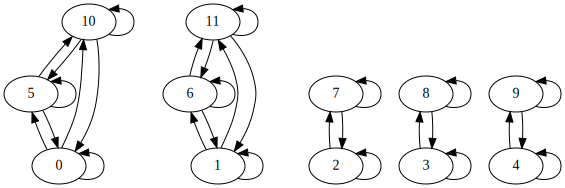

'Digraph.gv.svg'

In [10]:
r.pinta()

Esta relación no es de orden

In [11]:
r.es_orden()

False

Pues no es antisimétrica

In [12]:
r.es_antisimetrica()

False

## Diagramas de Hasse

Veamos ahora como ejemplo el conjunto de los divisores de 12 con la relación de divisibilidad

In [13]:
d = set(a for a in range(1,13) if 12%a ==0)

In [14]:
rd =relacion(set((a,b) for a in d for b in d if b%a ==0))

Podemos dibujar el diagrama de Hasse como sigue

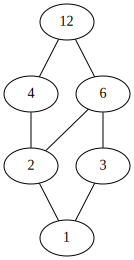

Relación binaria

In [15]:
rd.hasse()

O bien pintar todas las relaciones

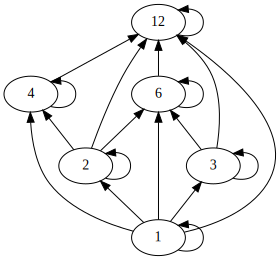

'Digraph.gv.svg'

In [16]:
rd.pinta()

Claramente esta relación es de orden, y no es un orden total

In [17]:
rd.es_orden()

True

In [18]:
rd.es_orden_total()

False

Los elementos notables se calculan con los métodos que tienen nombres acordes a ellos

In [19]:
rd.maximales(set({2,3,6}))

{6}

In [20]:
rd.maximales(set({2,3}))

{2, 3}

O incluso podemos destacar esos elementos en el dibujo de relaciones

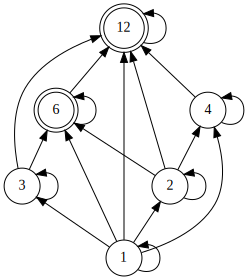

'Digraph.gv.svg'

In [21]:
rd.pinta(rd.mayorantes(set({2,3})))

In [22]:
rd.minimales(set({2,3}))

{2, 3}

In [23]:
rd.minimo(set({2,4}))

2

## Retículos

Continuamos con los divisores de 12

In [24]:
rd.es_reticulo_inferior()


True

In [25]:
rd.es_reticulo_superior()

True

In [26]:
rd.complemento(4)

3

In [27]:
rd.cero

1

In [28]:
rd.uno

12

In [29]:
rd.es_complementado()

False

Veamos qué elementos no tienen complemento

In [30]:
[a for a in rd.universo if rd.complemento(a)==None]

[2, 6]

Ahora damos un ejemplo que sí es complementado, de hecho un álgebra de Boole

In [31]:
u = set(a for a in range(1,31) if 30%a==0)

In [32]:
u

{1, 2, 3, 5, 6, 10, 15, 30}

In [33]:
p = set((a,b) for a in u for b in u if b%a ==0)

In [34]:
r = relacion(p)

In [35]:
r.es_distributivo()

True

In [36]:
r.atomos()

{2, 3, 5}

In [37]:
r.es_algebra_Boole()

True

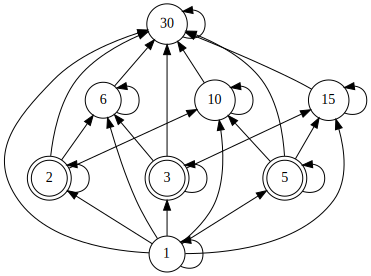

'Digraph.gv.svg'

In [38]:
r.pinta(r.atomos())

## Retículos de divisores 

Podemos definir retículos con los divisores de un entero o bien dar un conjunto ordenado por la relación de divisibilidad. Para ellos utilizaremos `divisores`

In [39]:
r = divisores(24)

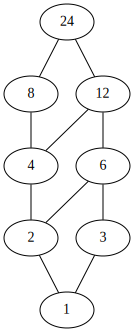

Relación binaria

In [40]:
r.hasse()

In [41]:
_.rels

{(1, 2),
 (1, 3),
 (2, 4),
 (2, 6),
 (3, 6),
 (4, 8),
 (4, 12),
 (6, 12),
 (8, 24),
 (12, 24)}

### El diamante

In [42]:
r = divisores({0,1,2,3,5})

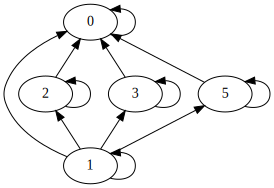

'Digraph.gv.svg'

In [43]:
r.pinta()

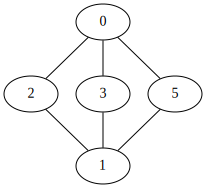

Relación binaria

In [44]:
r.hasse()

In [45]:
r.es_orden()

True

In [46]:
r.es_orden_total()

False

In [47]:
r.es_reticulo()

True

In [48]:
r.es_subreticulo({0,1,2,3})

True

In [49]:
r.es_distributivo()

False

In [50]:
r.es_complementado()

True

### El pentágono

In [51]:
r = divisores({1,0,2,4,3})

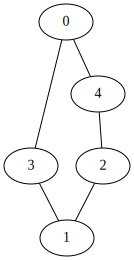

Relación binaria

In [52]:
r.hasse()

In [53]:
r.es_distributivo()

False

In [54]:
r.es_complementado()

True

### Otros ejemplos

Retículo que no es distributivo ni complementado

In [55]:
r=divisores({1,0,2,18,9,3})

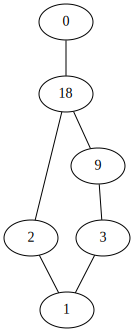

Relación binaria

In [56]:
r.hasse()

In [57]:
r.es_complementado()

False

In [58]:
r.es_distributivo()

False

In [59]:
[s for s in r.universo if r.complemento(s)==None]

[2, 18, 3, 9]

In [60]:
r.es_reticulo()

True

Retículo distributivo, no complementado

In [61]:
r = divisores({1,2,4})

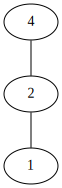

Relación binaria

In [62]:
r.hasse()

In [63]:
r.es_distributivo()

True

In [64]:
r.es_complementado()

False

In [65]:
r=divisores({0,1,2,3,4,6})

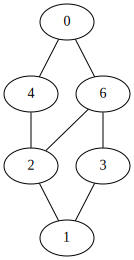

Relación binaria

In [66]:
r.hasse()

In [67]:
r.es_distributivo()

True

In [68]:
r.es_complementado()

False